In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Installer seaborn, si il pas déjà présent:

`python -m pip install seaborn`

## Import de la DataFrame : 

In [2]:
df_final = pd.read_csv(
    'Data/outputs/extract_df_final.csv', sep=';', encoding='utf-8-sig'
)

In [3]:
df_final = df_final.convert_dtypes()
df_final = df_final.astype(
    {'OverallStatus': 'category', 'StudyType': 'category', 'type': 'category'}
)
df_final = df_final.astype(
    {
        'StudyFirstPostDate': 'datetime64[ns]',
        'StartDate': 'datetime64[ns]',
        'CompletionDate': 'datetime64[ns]',
    }
)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   NCTId               706 non-null    string        
 1   BriefTitle          706 non-null    string        
 2   LeadSponsorName     706 non-null    string        
 3   CollaboratorName    357 non-null    string        
 4   OverallStatus       706 non-null    category      
 5   StudyType           706 non-null    category      
 6   HasResults          706 non-null    boolean       
 7   StudyFirstPostDate  706 non-null    datetime64[ns]
 8   StartDate           706 non-null    datetime64[ns]
 9   CompletionDate      705 non-null    datetime64[ns]
 10  pmid                568 non-null    Int64         
 11  type                568 non-null    category      
 12  title               568 non-null    string        
 13  authors             568 non-null    string        

In [4]:
df_final

,NCTId,BriefTitle,LeadSponsorName,CollaboratorName,OverallStatus,StudyType,HasResults,StudyFirstPostDate,StartDate,CompletionDate,pmid,type,title,authors,doi,year,publication_types
0,NCT02014727,Safety and Immunogenicity of Recombinant Pichi...,Institut National de la Santé Et de la Recherc...,"EVI Industries, Inc. | BPRC | Recherche Cliniq...",COMPLETED,INTERVENTIONAL,False,2013-12-18,2014-01-01,2015-07-01,28947345,DERIVED,Safety and immunogenicity of a recombinant Pla...,Sirima SB; Durier C; Kara L; Houard S; Gansane...,10.1016/j.vaccine.2017.09.027,2017,"['Clinical Trial, Phase I', 'Journal Article',..."
1,NCT00117494,Rosuvastatin Versus Pravastatin in HIV Patient...,French National Agency for Research on AIDS an...,<NA>,COMPLETED,INTERVENTIONAL,False,2005-07-07,2005-10-01,2007-06-01,22739396,DERIVED,Effects of rosuvastatin versus pravastatin on ...,Bittar R; Giral P; Aslangul E; Assoumou L; Val...,10.1097/QAD.0b013e328357063c,2012,"['Comparative Study', 'Journal Article', 'Mult..."
2,NCT00117494,Rosuvastatin Versus Pravastatin in HIV Patient...,French National Agency for Research on AIDS an...,<NA>,COMPLETED,INTERVENTIONAL,False,2005-07-07,2005-10-01,2007-06-01,22318219,DERIVED,Determinants of low-density lipoprotein partic...,Bittar R; Giral P; Aslangul E; Assoumou L; Val...,10.3851/IMP2065,2012,"['Journal Article', ""Research Support, Non-U.S..."
3,NCT00536627,Efficacy and Tolerance of Naked DNA Vaccine in...,French National Agency for Research on AIDS an...,<NA>,COMPLETED,INTERVENTIONAL,False,2007-09-28,2008-01-01,2010-11-01,24394187,DERIVED,Immunological and antiviral responses after th...,Godon O; Fontaine H; Kahi S; Meritet JF; Scott...,10.1038/mt.2013.274,2014,"['Clinical Trial, Phase I', 'Clinical Trial, P..."
4,NCT00536627,Efficacy and Tolerance of Naked DNA Vaccine in...,French National Agency for Research on AIDS an...,<NA>,COMPLETED,INTERVENTIONAL,False,2007-09-28,2008-01-01,2010-11-01,15382173,BACKGROUND,Induction or expansion of T-cell responses by ...,Mancini-Bourgine M; Fontaine H; Scott-Algara D...,10.1002/hep.20408,2004,"['Clinical Trial', 'Clinical Trial, Phase I', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,NCT02658253,Trial to Evaluate the Safety and Immunogenicit...,Institut National de la Santé Et de la Recherc...,"EVI Industries, Inc. | Recherche Clinique Pari...",COMPLETED,INTERVENTIONAL,False,2016-01-18,2016-01-01,2019-02-21,33717176,DERIVED,Progress and Insights Toward an Effective Plac...,Gamain B; Chêne A; Viebig NK; Tuikue Ndam N; N...,10.3389/fimmu.2021.634508,2021,"['Journal Article', ""Research Support, Non-U.S..."
702,NCT02658253,Trial to Evaluate the Safety and Immunogenicit...,Institut National de la Santé Et de la Recherc...,"EVI Industries, Inc. | Recherche Clinique Pari...",COMPLETED,INTERVENTIONAL,False,2016-01-18,2016-01-01,2019-02-21,32032566,DERIVED,PRIMVAC vaccine adjuvanted with Alhydrogel or ...,Sirima SB; Richert L; Chêne A; Konate AT; Camp...,10.1016/S1473-3099(19)30739-X,2020,"['Clinical Trial, Phase I', 'Journal Article',..."
703,NCT02027051,Etude génétique Des Arméniens,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,OBSERVATIONAL,False,2014-01-03,2014-01-01,2017-01-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
704,NCT00118677,Long-Term Supervised Treatment Interruption in...,French National Agency for Research on AIDS an...,<NA>,COMPLETED,INTERVENTIONAL,False,2005-07-12,2003-02-01,2007-05-01,20657770,DERIVED,Relationship between regulatory T cells and im...,Weiss L; Piketty C; Assoumou L; Didier C; Cacc...,10.1371/journal.pone.0011659,2010,"['Clinical Trial', 'Journal Article', 'Multice..."


## Vérification des sponsors:

In [5]:
df_final.drop_duplicates(subset='NCTId').loc[:, 'LeadSponsorName'].value_counts()

LeadSponsorName
Institut National de la Santé Et de la Recherche Médicale, France    139
ANRS, Emerging Infectious Diseases                                    82
French National Agency for Research on AIDS and Viral Hepatitis       65
Paris Cardiovascular Research Center (Inserm U970)                     2
Programme PAC-CI, Site ANRS-MIE de Côte d'Ivoire                       1
Name: count, dtype: Int64

## Vérification des dates :

#### StudyFirstPostDate :

In [6]:
df_final.drop_duplicates(subset='NCTId').loc[:, 'StudyFirstPostDate'].notna().value_counts()

StudyFirstPostDate
True    289
Name: count, dtype: int64

#### StartDate :

In [7]:
df_final.drop_duplicates(subset='NCTId').loc[:, 'StartDate'].notna().value_counts()

StartDate
True    289
Name: count, dtype: int64

#### CompletionDate :

In [8]:
df_final.drop_duplicates(subset='NCTId').loc[:, 'CompletionDate'].notna().value_counts()

CompletionDate
True     288
False      1
Name: count, dtype: int64

On a une valeur problématique :

In [9]:
df_final.loc[df_final.loc[:, 'CompletionDate'].isna()]

,NCTId,BriefTitle,LeadSponsorName,CollaboratorName,OverallStatus,StudyType,HasResults,StudyFirstPostDate,StartDate,CompletionDate,pmid,type,title,authors,doi,year,publication_types
435,NCT01271842,Long-term Outcome and Lung Capacity in Survivo...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,OBSERVATIONAL,False,2011-01-07,2010-10-01,NaT,22948576,DERIVED,Long-term outcomes of pandemic 2009 influenza ...,Luyt CE; Combes A; Becquemin MH; Beigelman-Aub...,10.1378/chest.11-2196,2012,"['Journal Article', 'Multicenter Study', ""Rese..."


D'après la NLM :

> Primary Completion Date was not required until  December 1, 2012 for newly registered records and Study Completion date is only required if Required if Study Start Date is on or after January 18, 2017.

## Publications par type et par année:

Nombre de publications par année:

In [10]:
publications_per_year_pivot_table = pd.pivot_table(
    df_final,
    index='year',
    columns='type',
    aggfunc='size',
    fill_value=0,
    observed=False,
)
publications_per_year_pivot_table

type,BACKGROUND,DERIVED,PUBMED,RESULT
year,,,,
1980,0,0,0,1
1990,0,0,0,1
1991,1,0,0,0
1994,2,0,0,0
1996,1,0,0,0
1998,1,0,0,0
1999,1,0,0,0
2000,2,0,0,1
2001,3,0,0,0


On complète l'index :

In [11]:
# We fill the years with no publications with the value 0, so they are not missing from the plot
publications_per_year_pivot_table = publications_per_year_pivot_table.reindex(
    range(
        publications_per_year_pivot_table.index[0],
        publications_per_year_pivot_table.index[-1] + 1,
    ),
    fill_value=0,
)

Génération du graphique :

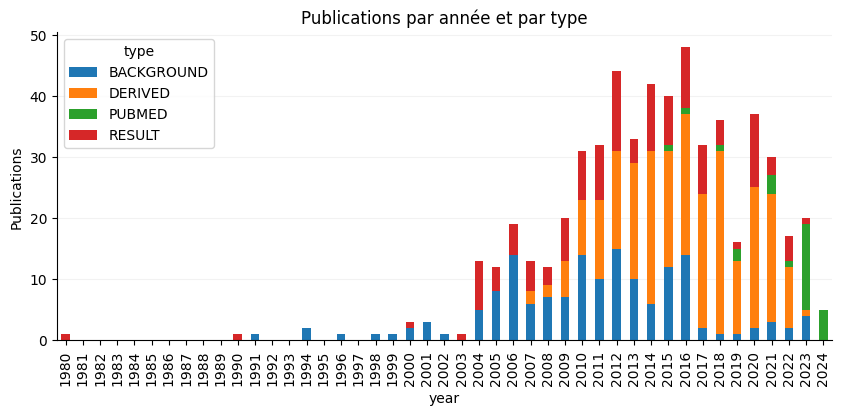

In [12]:
ax = publications_per_year_pivot_table.plot(
    kind='bar',
    title='Publications par année et par type',
    ylabel='Publications',
    figsize=(10, 4),
    stacked=True,
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='0.95')
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelrotation=90)

On remarque deux valeurs extrêmes qui sont classées comme **'RESULT'** :

In [13]:
mask = df_final.loc[:, 'year'] <= 1990

In [14]:
df_final.loc[mask]

,NCTId,BriefTitle,LeadSponsorName,CollaboratorName,OverallStatus,StudyType,HasResults,StudyFirstPostDate,StartDate,CompletionDate,pmid,type,title,authors,doi,year,publication_types
213,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,OBSERVATIONAL,False,2015-07-02,2015-10-07,2018-01-19,6774653,RESULT,Visual-motor function of the primate superior ...,Wurtz RH; Albano JE,10.1146/annurev.ne.03.030180.001201,1980,"['Comparative Study', 'Journal Article', 'Revi..."
276,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,False,2011-09-13,2011-09-01,2014-12-01,2271377,RESULT,Apomorphine-induced blinking and yawning in he...,Blin O; Masson G; Azulay JP; Fondarai J; Serra...,10.1111/j.1365-2125.1990.tb03848.x,1990,"['Clinical Trial', 'Comparative Study', 'Journ..."


Pour chacune de ces études, toutes leurs publications sont classées comme **'RESULT'**:

In [15]:
nctids = df_final.loc[mask, 'NCTId']

In [16]:
df_final.loc[df_final.loc[:, 'NCTId'] == nctids.iloc[0]]

,NCTId,BriefTitle,LeadSponsorName,CollaboratorName,OverallStatus,StudyType,HasResults,StudyFirstPostDate,StartDate,CompletionDate,pmid,type,title,authors,doi,year,publication_types
213,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,OBSERVATIONAL,False,2015-07-02,2015-10-07,2018-01-19,6774653,RESULT,Visual-motor function of the primate superior ...,Wurtz RH; Albano JE,10.1146/annurev.ne.03.030180.001201,1980,"['Comparative Study', 'Journal Article', 'Revi..."
214,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,OBSERVATIONAL,False,2015-07-02,2015-10-07,2018-01-19,23916713,RESULT,Enhanced visual responses in the superior coll...,Rolland M; Carcenac C; Overton PG; Savasta M; ...,10.1016/j.neuroscience.2013.07.047,2013,"['Journal Article', ""Research Support, Non-U.S..."
215,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,OBSERVATIONAL,False,2015-07-02,2015-10-07,2018-01-19,22639796,RESULT,Linking visual response properties in the supe...,Marino RA; Levy R; Boehnke S; White BJ; Itti L...,10.1111/j.1460-9568.2012.08079.x,2012,"['Journal Article', ""Research Support, Non-U.S..."


In [17]:
df_final.loc[df_final.loc[:, 'NCTId'] == nctids.iloc[1]]

,NCTId,BriefTitle,LeadSponsorName,CollaboratorName,OverallStatus,StudyType,HasResults,StudyFirstPostDate,StartDate,CompletionDate,pmid,type,title,authors,doi,year,publication_types
276,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,False,2011-09-13,2011-09-01,2014-12-01,2271377,RESULT,Apomorphine-induced blinking and yawning in he...,Blin O; Masson G; Azulay JP; Fondarai J; Serra...,10.1111/j.1365-2125.1990.tb03848.x,1990,"['Clinical Trial', 'Comparative Study', 'Journ..."
277,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,False,2011-09-13,2011-09-01,2014-12-01,15249613,RESULT,PET evidence for a role of the basal ganglia i...,Biraben A; Semah F; Ribeiro MJ; Douaud G; Remy...,10.1212/01.wnl.0000132840.40838.13,2004,"['Journal Article', ""Research Support, Non-U.S..."
278,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,False,2011-09-13,2011-09-01,2014-12-01,15777732,RESULT,"Lamotrigine, carbamazepine and phenytoin diffe...",Ahmad S; Fowler LJ; Whitton PS,10.1016/j.eplepsyres.2005.02.002,2005,"['Comparative Study', 'Journal Article']"
279,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,False,2011-09-13,2011-09-01,2014-12-01,12914551,RESULT,Pharmacokinetic-pharmacodynamic study of apomo...,Aymard G; Berlin I; de Brettes B; Diquet B,10.1046/j.1472-8206.2003.00152.x,2003,"['Clinical Trial', 'Journal Article', 'Randomi..."
280,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,False,2011-09-13,2011-09-01,2014-12-01,15037514,RESULT,Effect of acute and chronic lamotrigine on bas...,Ahmad S; Fowler LJ; Whitton PS,10.1038/sj.bjp.0705737,2004,"['Comparative Study', 'Journal Article']"


**Certaine etudes cliniques classent toutes les publications associées comme 'RESULT', on ne peut donc pas se fier a cette valeur**

In [18]:
len(df_final.loc[df_final.loc[:, 'NCTId'].isin(nctids)])

8

In [19]:
len(df_final.loc[df_final.loc[:, 'type'] == 'RESULT'])

132

Publications de type 'RESULT' dont la date de publication est antérieur à la début de l'essai clinique :

In [20]:
mask_1 = df_final.loc[:, 'type'] == 'RESULT'
mask_2 = df_final.loc[:, 'year'].astype('Int64') < pd.to_datetime(df_final.loc[:, 'StartDate'], format='ISO8601').dt.year.astype('Int64')
df_final.loc[mask_1 & mask_2, ['NCTId','StartDate', 'year']]

,NCTId,StartDate,year
158,NCT01490489,2011-07-11,2009
159,NCT01490489,2011-07-11,2006
160,NCT01490489,2011-07-11,2007
213,NCT02488395,2015-10-07,1980
214,NCT02488395,2015-10-07,2013
215,NCT02488395,2015-10-07,2012
276,NCT01432821,2011-09-01,1990
277,NCT01432821,2011-09-01,2004
278,NCT01432821,2011-09-01,2005
279,NCT01432821,2011-09-01,2003


**Les transformer en 'BACKGROUND' ?**

In [21]:
len(df_final.loc[mask_1 & mask_2])

13

In [22]:
nctids = df_final.loc[mask_1 & mask_2].loc[:, 'NCTId'].unique()
nctids

<StringArray>
['NCT01490489', 'NCT02488395', 'NCT01432821', 'NCT00136630']
Length: 4, dtype: string

In [23]:
df_final.loc[df_final.loc[: , 'NCTId'].isin(nctids), ['NCTId', 'type']]

,NCTId,type
158,NCT01490489,RESULT
159,NCT01490489,RESULT
160,NCT01490489,RESULT
213,NCT02488395,RESULT
214,NCT02488395,RESULT
215,NCT02488395,RESULT
276,NCT01432821,RESULT
277,NCT01432821,RESULT
278,NCT01432821,RESULT
279,NCT01432821,RESULT


On trouve d'avantage d'études dont toutes leurs publications sont classées comme **'RESULT'**:

In [24]:
df_final.loc[df_final.loc[:, 'NCTId'] == 'NCT01490489']

,NCTId,BriefTitle,LeadSponsorName,CollaboratorName,OverallStatus,StudyType,HasResults,StudyFirstPostDate,StartDate,CompletionDate,pmid,type,title,authors,doi,year,publication_types
158,NCT01490489,EG-VEGF : Potential Marker of Pre-eclampsia an...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,False,2011-12-13,2011-07-11,2015-03-13,19602057,RESULT,Role of EG-VEGF in human placentation: Physiol...,Hoffmann P; Saoudi Y; Benharouga M; Graham CH;...,10.1111/j.1582-4934.2008.00554.x,2009,"['Journal Article', ""Research Support, Non-U.S..."
159,NCT01490489,EG-VEGF : Potential Marker of Pre-eclampsia an...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,False,2011-12-13,2011-07-11,2015-03-13,16384869,RESULT,Expression and oxygen regulation of endocrine ...,Hoffmann P; Feige JJ; Alfaidy N,10.1210/en.2005-0912,2006,"['Journal Article', ""Research Support, Non-U.S..."
160,NCT01490489,EG-VEGF : Potential Marker of Pre-eclampsia an...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,False,2011-12-13,2011-07-11,2015-03-13,17531315,RESULT,Placental expression of EG-VEGF and its recept...,Hoffmann P; Feige JJ; Alfaidy N,10.1016/j.placenta.2007.03.008,2007,"['Journal Article', ""Research Support, Non-U.S..."


In [25]:
df_final.loc[df_final.loc[:, 'NCTId'] == 'NCT02488395']

,NCTId,BriefTitle,LeadSponsorName,CollaboratorName,OverallStatus,StudyType,HasResults,StudyFirstPostDate,StartDate,CompletionDate,pmid,type,title,authors,doi,year,publication_types
213,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,OBSERVATIONAL,False,2015-07-02,2015-10-07,2018-01-19,6774653,RESULT,Visual-motor function of the primate superior ...,Wurtz RH; Albano JE,10.1146/annurev.ne.03.030180.001201,1980,"['Comparative Study', 'Journal Article', 'Revi..."
214,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,OBSERVATIONAL,False,2015-07-02,2015-10-07,2018-01-19,23916713,RESULT,Enhanced visual responses in the superior coll...,Rolland M; Carcenac C; Overton PG; Savasta M; ...,10.1016/j.neuroscience.2013.07.047,2013,"['Journal Article', ""Research Support, Non-U.S..."
215,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,OBSERVATIONAL,False,2015-07-02,2015-10-07,2018-01-19,22639796,RESULT,Linking visual response properties in the supe...,Marino RA; Levy R; Boehnke S; White BJ; Itti L...,10.1111/j.1460-9568.2012.08079.x,2012,"['Journal Article', ""Research Support, Non-U.S..."


Les etudes dont toutes les publications sont de type 'RESULT' :

In [26]:
nctids = df_final.loc[:, 'NCTId'].unique()

res = []
for nctid in nctids:
    mask = df_final.loc[:, 'NCTId'] == nctid
    if (df_final.loc[mask, 'type'] == 'RESULT').all():
       res.append(nctid)
res

['NCT04470648',
 'NCT03235258',
 'NCT01490489',
 'NCT00196612',
 'NCT02488395',
 'NCT01882062',
 'NCT01432821',
 'NCT00196625',
 'NCT00334256',
 'NCT00196599',
 'NCT02916732']

In [27]:
len(res)

11

In [28]:
df_final.loc[df_final.loc[:, 'NCTId'].isin(res)]

,NCTId,BriefTitle,LeadSponsorName,CollaboratorName,OverallStatus,StudyType,HasResults,StudyFirstPostDate,StartDate,CompletionDate,pmid,type,title,authors,doi,year,publication_types
108,NCT04470648,COVID-19 Infection at Samusocial in Paris: Des...,Institut National de la Santé Et de la Recherc...,Samusocial de Paris | Assistance Publique - Hô...,COMPLETED,OBSERVATIONAL,False,2020-07-14,2020-07-22,2021-08-22,32371096,RESULT,SARS-CoV-2 was already spreading in France in ...,Deslandes A; Berti V; Tandjaoui-Lambotte Y; Al...,10.1016/j.ijantimicag.2020.106006,2020,['Journal Article']
109,NCT04470648,COVID-19 Infection at Samusocial in Paris: Des...,Institut National de la Santé Et de la Recherc...,Samusocial de Paris | Assistance Publique - Hô...,COMPLETED,OBSERVATIONAL,False,2020-07-14,2020-07-22,2021-08-22,32046819,RESULT,Incubation period of 2019 novel coronavirus (2...,Backer JA; Klinkenberg D; Wallinga J,10.2807/1560-7917.ES.2020.25.5.2000062,2020,['Journal Article']
110,NCT04470648,COVID-19 Infection at Samusocial in Paris: Des...,Institut National de la Santé Et de la Recherc...,Samusocial de Paris | Assistance Publique - Hô...,COMPLETED,OBSERVATIONAL,False,2020-07-14,2020-07-22,2021-08-22,32338732,RESULT,Prevalence of SARS-CoV-2 Infection in Resident...,Baggett TP; Keyes H; Sporn N; Gaeta JM,10.1001/jama.2020.6887,2020,['Journal Article']
111,NCT04470648,COVID-19 Infection at Samusocial in Paris: Des...,Institut National de la Santé Et de la Recherc...,Samusocial de Paris | Assistance Publique - Hô...,COMPLETED,OBSERVATIONAL,False,2020-07-14,2020-07-22,2021-08-22,32070465,RESULT,First cases of coronavirus disease 2019 (COVID...,Bernard Stoecklin S; Rolland P; Silue Y; Maill...,10.2807/1560-7917.ES.2020.25.6.2000094,2020,"['Case Reports', 'Journal Article']"
112,NCT04470648,COVID-19 Infection at Samusocial in Paris: Des...,Institut National de la Santé Et de la Recherc...,Samusocial de Paris | Assistance Publique - Hô...,COMPLETED,OBSERVATIONAL,False,2020-07-14,2020-07-22,2021-08-22,31978945,RESULT,A Novel Coronavirus from Patients with Pneumon...,Zhu N; Zhang D; Wang W; Li X; Yang B; Song J; ...,10.1056/NEJMoa2001017,2020,['Journal Article']
113,NCT04470648,COVID-19 Infection at Samusocial in Paris: Des...,Institut National de la Santé Et de la Recherc...,Samusocial de Paris | Assistance Publique - Hô...,COMPLETED,OBSERVATIONAL,False,2020-07-14,2020-07-22,2021-08-22,32109013,RESULT,Clinical Characteristics of Coronavirus Diseas...,Guan WJ; Ni ZY; Hu Y; Liang WH; Ou CQ; He JX; ...,10.1056/NEJMoa2002032,2020,"['Journal Article', ""Research Support, Non-U.S..."
114,NCT04470648,COVID-19 Infection at Samusocial in Paris: Des...,Institut National de la Santé Et de la Recherc...,Samusocial de Paris | Assistance Publique - Hô...,COMPLETED,OBSERVATIONAL,False,2020-07-14,2020-07-22,2021-08-22,31995857,RESULT,"Early Transmission Dynamics in Wuhan, China, o...",Li Q; Guan X; Wu P; Wang X; Zhou L; Tong Y; Re...,10.1056/NEJMoa2001316,2020,"['Journal Article', 'Research Support, N.I.H.,..."
115,NCT04470648,COVID-19 Infection at Samusocial in Paris: Des...,Institut National de la Santé Et de la Recherc...,Samusocial de Paris | Assistance Publique - Hô...,COMPLETED,OBSERVATIONAL,False,2020-07-14,2020-07-22,2021-08-22,32224310,RESULT,Clinical and virological data of the first cas...,Lescure FX; Bouadma L; Nguyen D; Parisey M; Wi...,10.1016/S1473-3099(20)30200-0,2020,"['Journal Article', 'Observational Study', ""Re..."
132,NCT03235258,Cohort of HIV-infected Children,"ANRS, Emerging Infectious Diseases",<NA>,COMPLETED,OBSERVATIONAL,False,2017-08-01,2004-07-01,2020-06-01,21971357,RESULT,Early antiretroviral therapy in HIV-1-infected...,Judd A; European Pregnancy and Paediatric HIV ...,10.1097/QAD.0b013e32834d614c,2011,"['Comparative Study', 'Journal Article']"
133,NCT03235258,Cohort of HIV-infected Children,"ANRS, Emerging Infectious Diseases",<NA>,COMPLETED,OBSERVATIONAL,False,2017-08-01,2004-07-01,2020-06-01,22427678,RESULT,Relationships betwe

### Champ 'HasResults':

Etudes dont le champ 'HasResults' est True:

In [29]:
df_final.loc[df_final.loc[:, 'HasResults'], 'NCTId'].unique()

<StringArray>
['NCT02453048', 'NCT02573948', 'NCT01882062', 'NCT02212379', 'NCT01605890',
 'NCT00928187']
Length: 6, dtype: string

In [30]:
df_final.loc[df_final.loc[:, 'HasResults']]

,NCTId,BriefTitle,LeadSponsorName,CollaboratorName,OverallStatus,StudyType,HasResults,StudyFirstPostDate,StartDate,CompletionDate,pmid,type,title,authors,doi,year,publication_types
78,NCT02453048,Study of BPZE1 (High Dose) Nasal Live Attenuat...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,True,2015-05-25,2015-09-01,2017-12-01,24793938,BACKGROUND,B-cell responses after intranasal vaccination ...,Jahnmatz M; Amu S; Ljungman M; Wehlin L; Chiod...,10.1016/j.vaccine.2014.04.048,2014,"['Clinical Trial, Phase I', 'Journal Article',..."
79,NCT02453048,Study of BPZE1 (High Dose) Nasal Live Attenuat...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,True,2015-05-25,2015-09-01,2017-12-01,24950361,BACKGROUND,Heterologous prime-boost immunization with liv...,Feunou PF; Kammoun H; Debrie AS; Locht C,10.1016/j.vaccine.2014.06.019,2014,"['Journal Article', ""Research Support, Non-U.S..."
80,NCT02453048,Study of BPZE1 (High Dose) Nasal Live Attenuat...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,True,2015-05-25,2015-09-01,2017-12-01,22814407,BACKGROUND,Dual mechanism of protection by live attenuate...,Kammoun H; Feunou PF; Foligne B; Debrie AS; Ra...,10.1016/j.vaccine.2012.07.005,2012,"['Journal Article', ""Research Support, Non-U.S..."
81,NCT02453048,Study of BPZE1 (High Dose) Nasal Live Attenuat...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,True,2015-05-25,2015-09-01,2017-12-01,24421886,BACKGROUND,A phase I clinical study of a live attenuated ...,Thorstensson R; Trollfors B; Al-Tawil N; Jahnm...,10.1371/journal.pone.0083449,2014,"['Clinical Trial, Phase I', 'Journal Article',..."
82,NCT02453048,Study of BPZE1 (High Dose) Nasal Live Attenuat...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,True,2015-05-25,2015-09-01,2017-12-01,21430219,BACKGROUND,Attenuated Bordetella pertussis vaccine candid...,Fedele G; Bianco M; Debrie AS; Locht C; Ausiel...,10.4049/jimmunol.1003765,2011,"['Journal Article', ""Research Support, Non-U.S..."
83,NCT02453048,Study of BPZE1 (High Dose) Nasal Live Attenuat...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,True,2015-05-25,2015-09-01,2017-12-01,21147936,BACKGROUND,"A live, attenuated Bordetella pertussis vaccin...",Skerry CM; Mahon BP,10.1128/CVI.00371-10,2011,"['Journal Article', ""Research Support, Non-U.S..."
84,NCT02453048,Study of BPZE1 (High Dose) Nasal Live Attenuat...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,True,2015-05-25,2015-09-01,2017-12-01,31945015,DERIVED,Live attenuated pertussis vaccine BPZE1 induce...,Lin A; Apostolovic D; Jahnmatz M; Liang F; Ols...,10.1172/JCI135020,2020,"['Journal Article', 'Randomized Controlled Tri..."
85,NCT02453048,Study of BPZE1 (High Dose) Nasal Live Attenuat...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,True,2015-05-25,2015-09-01,2017-12-01,19625486,BACKGROUND,A live attenuated Bordetella pertussis candida...,Skerry CM; Cassidy JP; English K; Feunou-Feuno...,10.1128/CVI.00082-09,2009,"['Journal Article', ""Research Support, Non-U.S..."
86,NCT02453048,Study of BPZE1 (High Dose) Nasal Live Attenuat...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,True,2015-05-25,2015-09-01,2017-12-01,32687804,DERIVED,Safety and immunogenicity of the live attenuat...,Jahnmatz M; Richert L; Al-Tawil N; Storsaeter ...,10.1016/S1473-3099(20)30274-7,2020,"['Clinical Trial, Phase I', 'Journal Article',..."
87,NCT02453048,Study of BPZE1 (High Dose) Nasal Live Attenuat...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,True,2015-05-25,2015-09-01,2017-12-01,20708998,BACKGROUND,Long-term immunity against pertussis induced b...,Feunou PF; Kammoun H; Debrie AS; Mielcarek N; ...,10.1016/j.vaccine.2010.08.017,2010,"['Journal Article', ""Research Support, Non-

In [31]:
nb_studies = len(df_final.loc[:, 'NCTId'].unique())
nb_studies_has_result = len(df_final.loc[df_final.loc[:, 'HasResults'], 'NCTId'].unique())
print(f"Nombre d'etudes dont le champ 'HasResults' est True: {nb_studies_has_result}/{nb_studies}")

Nombre d'etudes dont le champ 'HasResults' est True: 6/289


**Le nombre très faible d'études qui renseignent le champ 'HasResults', fait que l'on peut difficilement exploiter cette donnée**.

Mais quand le champs est renseigné, on a affaire à des études de qualité, où on peut généralement se fier au type de publication indiqué.

### Publications par année et par type : 

In [33]:
df_year_type = df_final.loc[:, ['year', 'type']].dropna()
df_year_type

,year,type
0,2017,DERIVED
1,2012,DERIVED
2,2012,DERIVED
3,2014,DERIVED
4,2004,BACKGROUND
...,...,...
697,2023,PUBMED
698,2018,DERIVED
701,2021,DERIVED
702,2020,DERIVED


In [34]:
min_year =df_year_type.loc[:, 'year'].min()
max_year = df_year_type.loc[:, 'year'].max()

In [35]:
palette ={'BACKGROUND': "C0", "DERIVED": "C1", "PUBMED": "C3", "RESULT": "C2"}

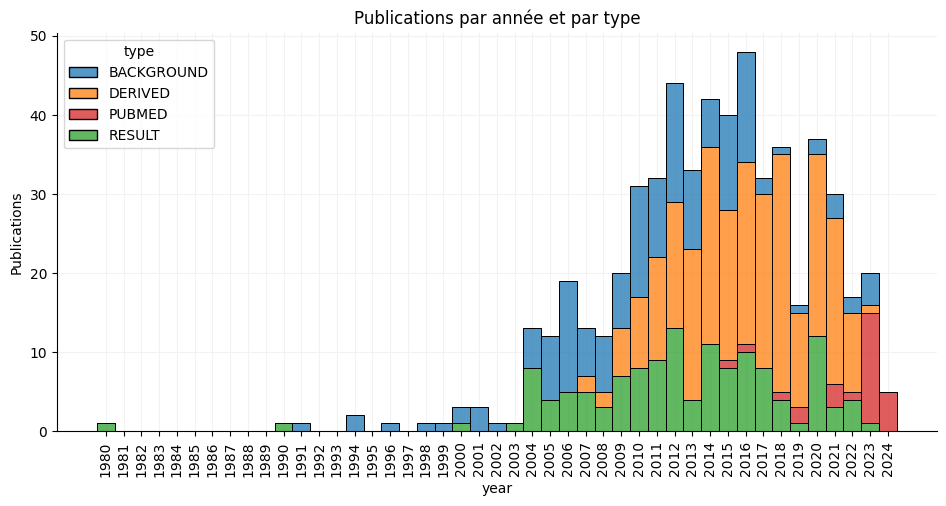

In [36]:
g = sns.histplot(data=df_year_type, x='year', hue='type', multiple='stack', discrete=True, palette=palette)

# x axis ticks
g.set_xticks(range(min_year, max_year + 1))
g.tick_params(axis='x', labelrotation=90)

# Grid
g.grid(color='0.95')
g.set_axisbelow(True)

# Figure size
plt.tight_layout()
g.figure.set_figwidth(10)
g.figure.set_figheight(5)

# Title
g.set(title='Publications par année et par type', ylabel='Publications')

# Remove spines
sns.despine()

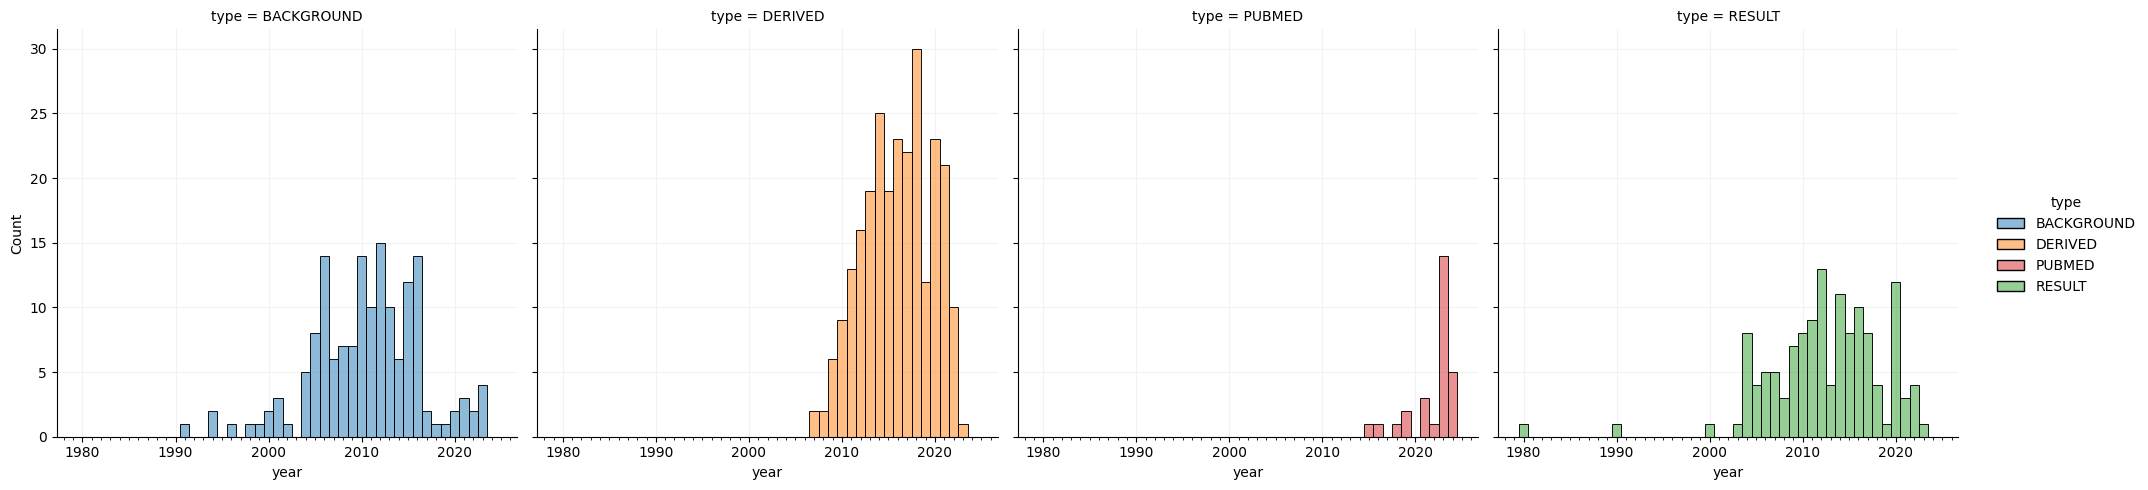

In [37]:
from matplotlib.ticker import AutoMinorLocator

g = sns.displot(data=df_year_type, x='year', hue='type', kind='hist', col='type', discrete=True, palette=palette)

for ax in g.axes[0]:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

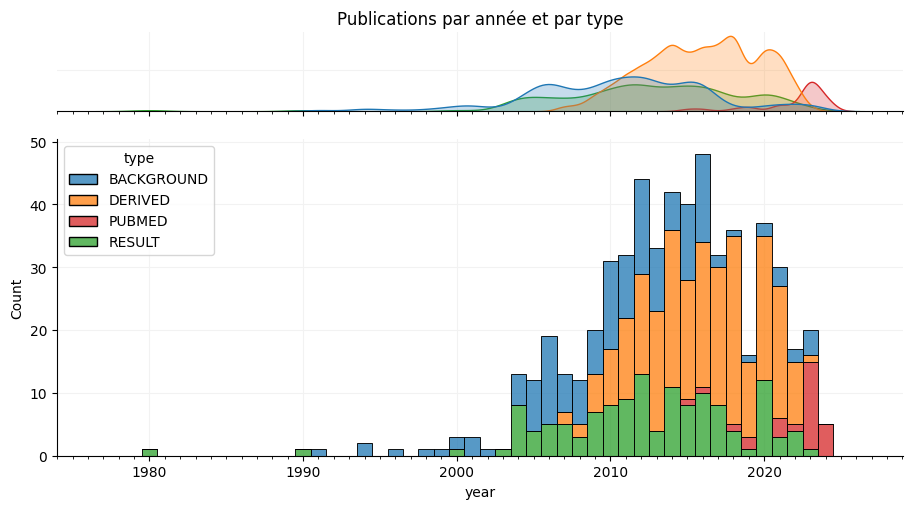

In [38]:
fig, axes = plt.subplots(2, 1, sharex=True, height_ratios=[1, 4])

sns.kdeplot(ax=axes[0], data=df_year_type, x='year', hue='type', fill=True, bw_adjust=.5, legend=False, palette=palette)
sns.histplot(data=df_year_type, x='year', hue='type', multiple='stack', discrete=True, palette=palette)

# Figure size
fig.tight_layout()
fig.figure.set_figwidth(10)
fig.figure.set_figheight(5)

for ax in axes:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

# Title
axes[0].set(title='Publications par année et par type', ylabel='')

# Remove spines
sns.despine()
sns.despine(ax=axes[0], left=True)
axes[0].set(yticklabels=[])  # remove the tick labels
axes[0].tick_params(left=False)  # remove the ticks

### Délai entre la publication et la fin de l'étude :

In [39]:
df_final.loc[:, ['NCTId', 'type', 'CompletionDate', 'year']]

,NCTId,type,CompletionDate,year
0,NCT02014727,DERIVED,2015-07-01,2017
1,NCT00117494,DERIVED,2007-06-01,2012
2,NCT00117494,DERIVED,2007-06-01,2012
3,NCT00536627,DERIVED,2010-11-01,2014
4,NCT00536627,BACKGROUND,2010-11-01,2004
...,...,...,...,...
701,NCT02658253,DERIVED,2019-02-21,2021
702,NCT02658253,DERIVED,2019-02-21,2020
703,NCT02027051,<NA>,2017-01-01,<NA>
704,NCT00118677,DERIVED,2007-05-01,2010


In [40]:
time_completion_publication = df_final.loc[:, 'year'] - df_final.loc[:, 'CompletionDate'].dt.year.astype('Int64')
time_completion_publication = time_completion_publication.rename('TimeCompletionPublication')
time_completion_publication = df_final.loc[:, ['NCTId', 'type', 'CompletionDate', 'year']].join(time_completion_publication)
time_completion_publication

,NCTId,type,CompletionDate,year,TimeCompletionPublication
0,NCT02014727,DERIVED,2015-07-01,2017,2
1,NCT00117494,DERIVED,2007-06-01,2012,5
2,NCT00117494,DERIVED,2007-06-01,2012,5
3,NCT00536627,DERIVED,2010-11-01,2014,4
4,NCT00536627,BACKGROUND,2010-11-01,2004,-6
...,...,...,...,...,...
701,NCT02658253,DERIVED,2019-02-21,2021,2
702,NCT02658253,DERIVED,2019-02-21,2020,1
703,NCT02027051,<NA>,2017-01-01,<NA>,<NA>
704,NCT00118677,DERIVED,2007-05-01,2010,3


In [41]:
# min_time = time_completion_publication.loc[:, 'TimeCompletionPublication'].min()
# max_time = time_completion_publication.loc[:, 'TimeCompletionPublication'].max()

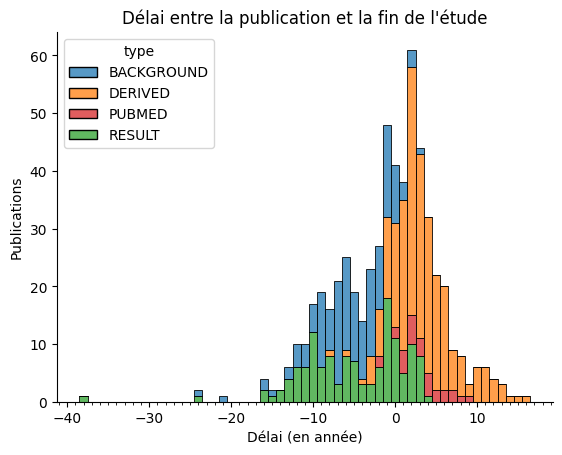

In [42]:
g = sns.histplot(
    data=time_completion_publication,
    x='TimeCompletionPublication',
    hue='type',
    multiple='stack',
    # element="step",
    discrete=True,
    palette=palette,
)

# x axis ticks
g.xaxis.set_minor_locator(AutoMinorLocator(10))

# Title
g.set(
    title="Délai entre la publication et la fin de l'étude", 
    xlabel='Délai (en année)',
    ylabel='Publications',
)

# Remove spines
sns.despine()

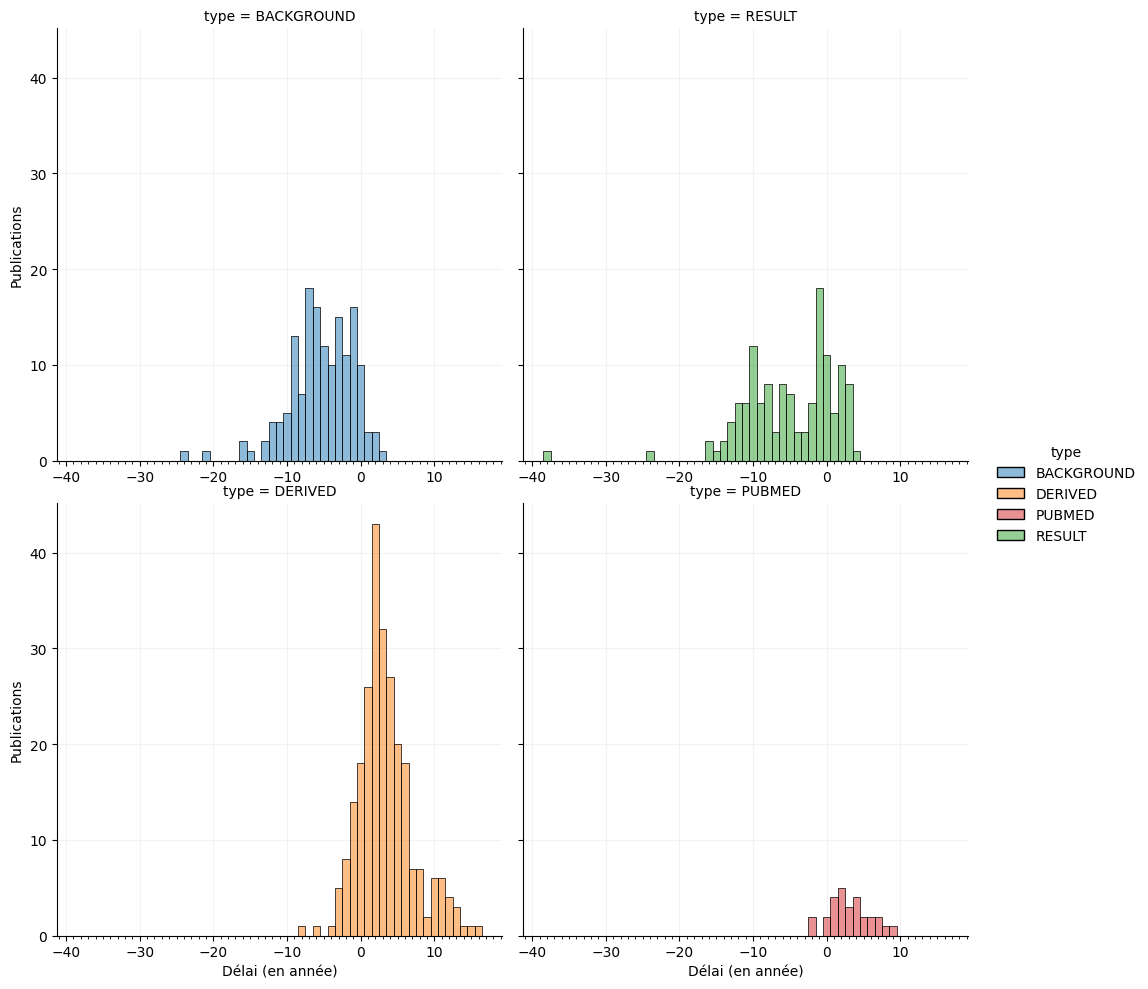

In [210]:
g = sns.displot(
    data=time_completion_publication,
    x='TimeCompletionPublication',
    hue='type',
    col='type',
    col_order=['BACKGROUND', 'RESULT', 'DERIVED', 'PUBMED'],
    col_wrap=2,
    discrete=True,
    kind='hist',
    palette=palette,
)

g.tick_params(labelbottom=True)
g.set_axis_labels('Délai (en année)', 'Publications')

for ax in g.axes:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

**Les publications de type 'BACKGROUND' après la date de fin de l'étude sont problématiques**

**Problablement des publications de type 'RESULT' parmis les 'DERIVED'**

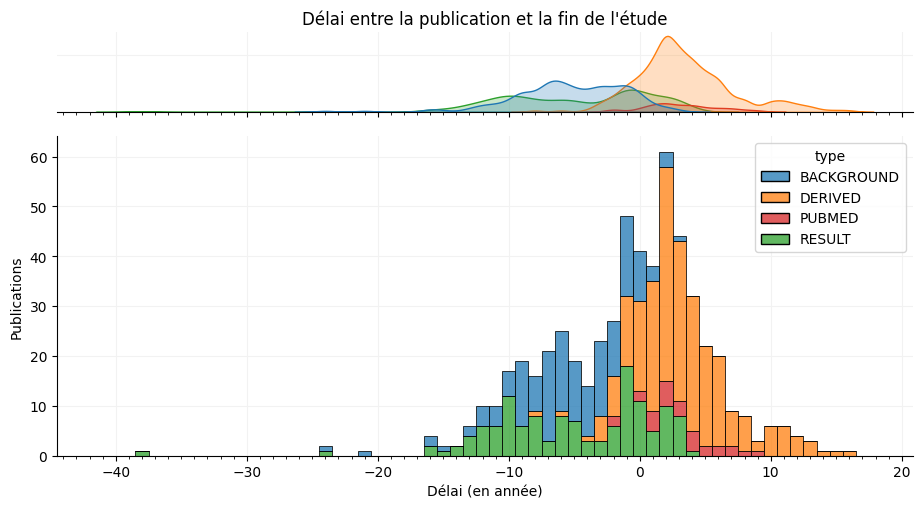

In [44]:
fig, axes = plt.subplots(2, 1, sharex=True, height_ratios=[1, 4])

sns.kdeplot(ax=axes[0], data=time_completion_publication, x='TimeCompletionPublication', hue='type', fill=True, bw_adjust=.5, legend=False, palette=palette)
sns.histplot(data=time_completion_publication, x='TimeCompletionPublication', hue='type', multiple='stack', discrete=True, palette=palette)

# Figure size
fig.tight_layout()
fig.figure.set_figwidth(10)
fig.figure.set_figheight(5)

for ax in axes:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

# Title
axes[0].set(
    title="Délai entre la publication et la fin de l'étude", 
    ylabel=''
)
axes[1].set( 
    xlabel='Délai (en année)',
    ylabel='Publications',
)

# Remove spines
sns.despine()
sns.despine(ax=axes[0], left=True)
axes[0].set(yticklabels=[])  # remove the tick labels
axes[0].tick_params(left=False)  # remove the ticks

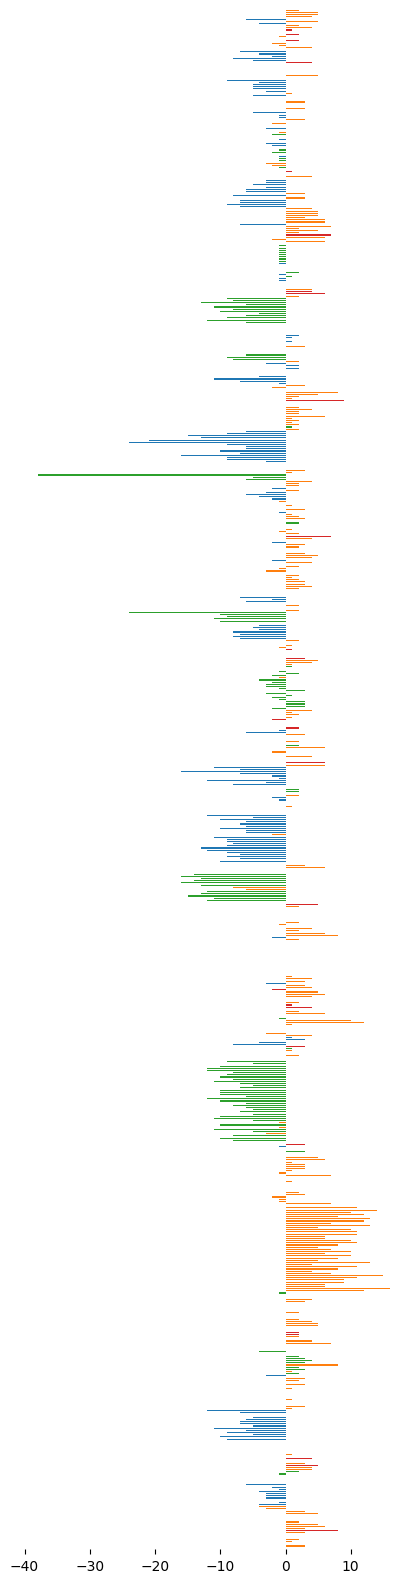

In [45]:
for type in ['BACKGROUND', 'DERIVED', 'PUBMED', 'RESULT']:
    mask_type = time_completion_publication.loc[:, 'type'] == type
    df_type = time_completion_publication.loc[mask_type, 'TimeCompletionPublication']
    df_type = df_type.reindex(time_completion_publication.index)

    axs = df_type.plot.barh(
        # x=time_completion_publication.index,
        y='TimeCompletionPublication',
        figsize=(5, 20),
        color=palette[type],
    )

axs.invert_yaxis()
axs.yaxis.set_visible(False)
axs.set_frame_on(False)

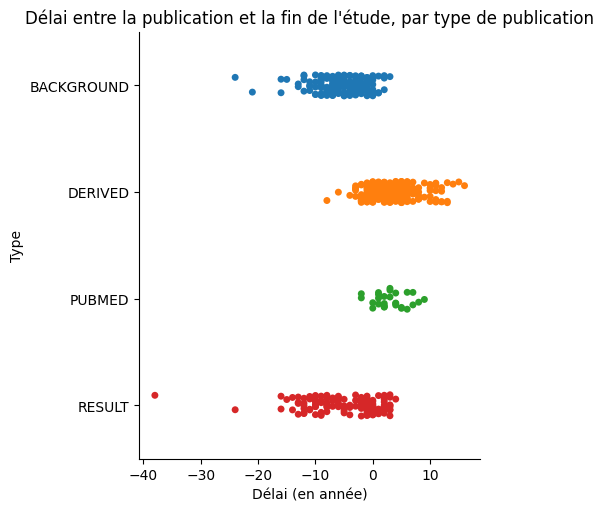

In [46]:
g = sns.catplot(data=time_completion_publication.dropna(), x='TimeCompletionPublication', y='type', hue='type', jitter=True)

# Title
g.set(
    title="Délai entre la publication et la fin de l'étude, par type de publication", 
    xlabel='Délai (en année)',
    ylabel='Type',
)

### Délai entre la publication et le début de l'étude :

In [47]:
df_final.loc[:, ['NCTId', 'type', 'StartDate', 'year']]

,NCTId,type,StartDate,year
0,NCT02014727,DERIVED,2014-01-01,2017
1,NCT00117494,DERIVED,2005-10-01,2012
2,NCT00117494,DERIVED,2005-10-01,2012
3,NCT00536627,DERIVED,2008-01-01,2014
4,NCT00536627,BACKGROUND,2008-01-01,2004
...,...,...,...,...
701,NCT02658253,DERIVED,2016-01-01,2021
702,NCT02658253,DERIVED,2016-01-01,2020
703,NCT02027051,<NA>,2014-01-01,<NA>
704,NCT00118677,DERIVED,2003-02-01,2010


In [48]:
time_start_publication = df_final.loc[:, 'year'] - df_final.loc[:, 'StartDate'].dt.year.astype('Int64')
time_start_publication = time_start_publication.rename('TimeStartPublication')
time_start_publication = df_final.loc[:, ['NCTId', 'type', 'StartDate', 'year']].join(time_start_publication)
time_start_publication

,NCTId,type,StartDate,year,TimeStartPublication
0,NCT02014727,DERIVED,2014-01-01,2017,3
1,NCT00117494,DERIVED,2005-10-01,2012,7
2,NCT00117494,DERIVED,2005-10-01,2012,7
3,NCT00536627,DERIVED,2008-01-01,2014,6
4,NCT00536627,BACKGROUND,2008-01-01,2004,-4
...,...,...,...,...,...
701,NCT02658253,DERIVED,2016-01-01,2021,5
702,NCT02658253,DERIVED,2016-01-01,2020,4
703,NCT02027051,<NA>,2014-01-01,<NA>,<NA>
704,NCT00118677,DERIVED,2003-02-01,2010,7


In [49]:
# min_time = time_completion_publication.loc[:, 'TimeCompletionPublication'].min()
# max_time = time_completion_publication.loc[:, 'TimeCompletionPublication'].max()

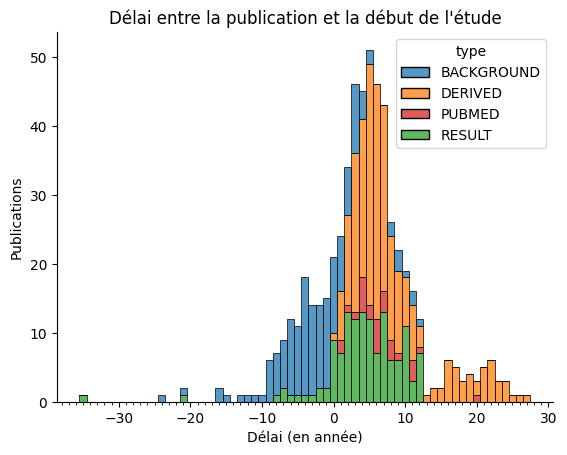

In [50]:
g = sns.histplot(
    data=time_start_publication,
    x='TimeStartPublication',
    hue='type',
    multiple='stack',
    # element="step",
    discrete=True,
    palette=palette,
)

# x axis ticks
g.xaxis.set_minor_locator(AutoMinorLocator(10))

# Title
g.set(
    title="Délai entre la publication et la début de l'étude", 
    xlabel='Délai (en année)',
    ylabel='Publications',
)

# Remove spines
sns.despine()

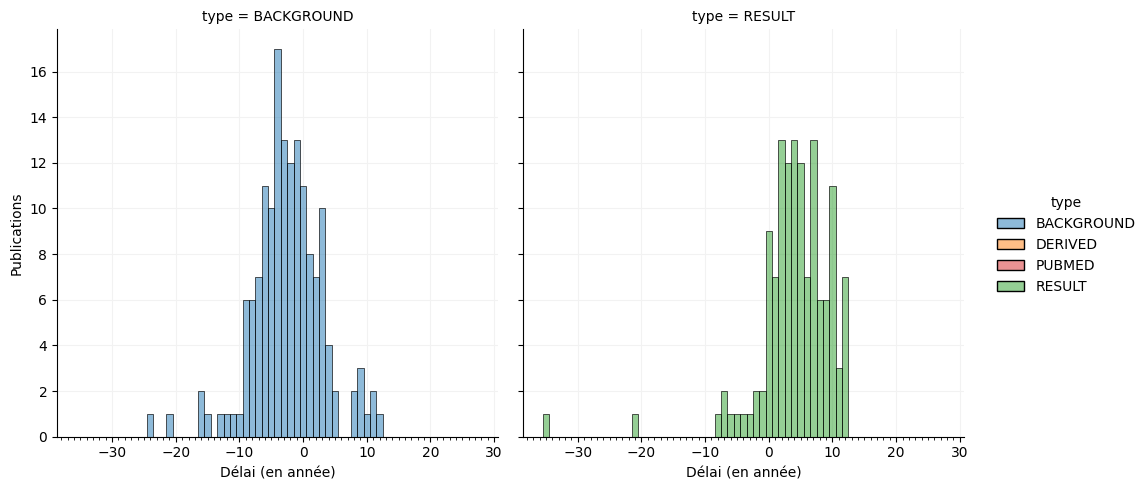

In [51]:
g = sns.displot(
    data=time_start_publication,
    x='TimeStartPublication',
    hue='type',
    col='type',
    col_order=['BACKGROUND', 'RESULT'],
    discrete=True,
    kind='hist',
    palette=palette,
)
# g.set_ylabels('Publications')

# Title
g.set(
    xlabel='Délai (en année)',
    ylabel='Publications',
)

for ax in g.axes[0]:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

**Les publications de type 'RESULT' avant la date de début de l'étude sont problématiques -> BACKGROUND**

**Le cluster de publications de type 'BACKGROUND' 10 ans après le début des études est suspect**  
S'agit-il de 'RESULT' ?

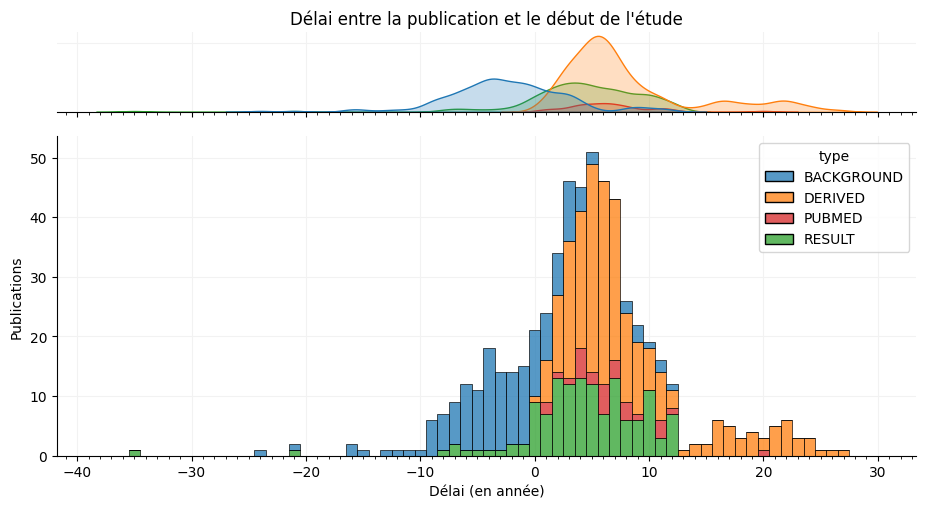

In [52]:
fig, axes = plt.subplots(2, 1, sharex=True, height_ratios=[1, 4])

sns.kdeplot(ax=axes[0], data=time_start_publication, x='TimeStartPublication', hue='type', fill=True, bw_adjust=.5, legend=False, palette=palette)
sns.histplot(data=time_start_publication, x='TimeStartPublication', hue='type', multiple='stack', discrete=True, palette=palette)

# Figure size
fig.tight_layout()
fig.figure.set_figwidth(10)
fig.figure.set_figheight(5)

for ax in axes:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

# Title
axes[0].set(
    title="Délai entre la publication et le début de l'étude", 
    ylabel=''
)
axes[1].set( 
    xlabel='Délai (en année)',
    ylabel='Publications',
)

# Remove spines
sns.despine()
sns.despine(ax=axes[0], left=True)
axes[0].set(yticklabels=[])  # remove the tick labels
axes[0].tick_params(left=False)  # remove the ticks

**-> Passer toutes les publications de type 'RESULT' dont la date est antérieur à la date de début de l'étude en 'BACKGROUND'**

Nombre d'études cliniques:

In [55]:
len(df_final.loc[:, 'NCTId'].unique())

289

Nombre de publications :

In [63]:
df_final.loc[:, 'pmid'].notna().sum()

568

In [67]:
df_final.loc[:, 'type'].value_counts()

type
DERIVED       253
BACKGROUND    155
RESULT        132
PUBMED         28
Name: count, dtype: int64

Nombre d'études sans publications :

In [71]:
len(df_final.loc[df_final.loc[:, 'pmid'].isna(), 'NCTId'])

138

Nombre d'études avec au moins une publication :

In [75]:
len(df_final.loc[df_final.loc[:, 'pmid'].notna(), 'NCTId'].unique())

151

In [79]:
assert len(
    df_final.loc[:, 'NCTId'].unique() == (
        len(df_final.loc[df_final.loc[:, 'pmid'].isna(), 'NCTId'])
        + len(df_final.loc[df_final.loc[:, 'pmid'].notna(), 'NCTId'].unique())
    )
)

Nombre d'études avec au moins une publication de type 'RESULT' :

In [80]:
nctids = df_final.loc[:, 'NCTId'].unique()

res = []
for nctid in nctids:
    mask = df_final.loc[:, 'NCTId'] == nctid
    if (df_final.loc[mask, 'type'] == 'RESULT').any():
       res.append(nctid)
res

['NCT04315948',
 'NCT04470648',
 'NCT02573948',
 'NCT03235258',
 'NCT01490489',
 'NCT00196612',
 'NCT02488395',
 'NCT01882062',
 'NCT01432821',
 'NCT01546181',
 'NCT00988767',
 'NCT00196625',
 'NCT00136630',
 'NCT01494961',
 'NCT02329054',
 'NCT03324633',
 'NCT00158405',
 'NCT00272428',
 'NCT00334256',
 'NCT00196599',
 'NCT00454337',
 'NCT00158509',
 'NCT02916732']

In [83]:
len(res)

23

In [92]:
df_final.loc[df_final.loc[:, 'NCTId'] == 'NCT04470648', ['NCTId', 'pmid', 'type']]

,NCTId,pmid,type
108,NCT04470648,32371096,RESULT
109,NCT04470648,32046819,RESULT
110,NCT04470648,32338732,RESULT
111,NCT04470648,32070465,RESULT
112,NCT04470648,31978945,RESULT
113,NCT04470648,32109013,RESULT
114,NCT04470648,31995857,RESULT
115,NCT04470648,32224310,RESULT


In [93]:
df_final.loc[df_final.loc[:, 'NCTId'].isin(res), ['NCTId', 'pmid', 'type']]

,NCTId,pmid,type
52,NCT04315948,34350582,DERIVED
53,NCT04315948,37269068,BACKGROUND
54,NCT04315948,32473020,BACKGROUND
55,NCT04315948,37302469,BACKGROUND
56,NCT04315948,35512728,DERIVED
...,...,...,...
628,NCT00158509,17314338,DERIVED
629,NCT00158509,16044019,RESULT
630,NCT00158509,18596069,DERIVED
670,NCT02916732,33657112,RESULT


In [118]:
nctid = 'NCT00647205'
mask = df_final.loc[:, 'NCTId'] == nctid
(df_final.loc[mask, 'type'].isin(['DERIVED', 'RESULT', 'PUBMED']).any())

False

Nombre d'études avec au moins une publication autre que 'BACKGROUND' :

In [119]:
nctids = df_final.loc[:, 'NCTId'].unique()

res = []
for nctid in nctids:
    mask = df_final.loc[:, 'NCTId'] == nctid
    if (df_final.loc[mask, 'type'].isin(['DERIVED', 'RESULT', 'PUBMED']).any()):
       res.append(nctid)
res

['NCT02014727',
 'NCT00117494',
 'NCT00536627',
 'NCT01033760',
 'NCT05349162',
 'NCT02777229',
 'NCT00480792',
 'NCT01453192',
 'NCT00528060',
 'NCT04008927',
 'NCT02273765',
 'NCT01055873',
 'NCT02099474',
 'NCT04315948',
 'NCT05311865',
 'NCT00122616',
 'NCT02453048',
 'NCT00120757',
 'NCT02566148',
 'NCT00640263',
 'NCT04470648',
 'NCT02573948',
 'NCT00820118',
 'NCT01801618',
 'NCT02405013',
 'NCT01779713',
 'NCT03235258',
 'NCT02192658',
 'NCT00383734',
 'NCT01490489',
 'NCT01335529',
 'NCT02542891',
 'NCT01066962',
 'NCT01703962',
 'NCT01127204',
 'NCT01771562',
 'NCT00196612',
 'NCT01226446',
 'NCT00424814',
 'NCT02488395',
 'NCT00658346',
 'NCT01188512',
 'NCT04945655',
 'NCT01332955',
 'NCT02592174',
 'NCT02100774',
 'NCT01882062',
 'NCT01473472',
 'NCT00495326',
 'NCT03459157',
 'NCT00339157',
 'NCT01555450',
 'NCT01348308',
 'NCT01696708',
 'NCT01509508',
 'NCT00122603',
 'NCT00121121',
 'NCT01432821',
 'NCT02992184',
 'NCT01514890',
 'NCT02212379',
 'NCT03335995',
 'NCT009

In [120]:
len(res)

137

**Les publications de type 'RESULT' avant la date de début de l'étude sont problématique, on veut les passer en 'BACKGROUND'**

In [122]:
time_start_publication

,NCTId,type,StartDate,year,TimeStartPublication
0,NCT02014727,DERIVED,2014-01-01,2017,3
1,NCT00117494,DERIVED,2005-10-01,2012,7
2,NCT00117494,DERIVED,2005-10-01,2012,7
3,NCT00536627,DERIVED,2008-01-01,2014,6
4,NCT00536627,BACKGROUND,2008-01-01,2004,-4
...,...,...,...,...,...
701,NCT02658253,DERIVED,2016-01-01,2021,5
702,NCT02658253,DERIVED,2016-01-01,2020,4
703,NCT02027051,<NA>,2014-01-01,<NA>,<NA>
704,NCT00118677,DERIVED,2003-02-01,2010,7


In [143]:
mask_result = time_start_publication.loc[:, 'type'] == 'RESULT'
mask_neg = time_start_publication.loc[:, 'TimeStartPublication'] < 0
df_final.loc[mask_result & mask_neg, ['NCTId', 'pmid', 'type']].join(time_start_publication.loc[:,'TimeStartPublication'])

,NCTId,pmid,type,TimeStartPublication
158,NCT01490489,19602057,RESULT,-2
159,NCT01490489,16384869,RESULT,-5
160,NCT01490489,17531315,RESULT,-4
213,NCT02488395,6774653,RESULT,-35
214,NCT02488395,23916713,RESULT,-2
215,NCT02488395,22639796,RESULT,-3
276,NCT01432821,2271377,RESULT,-21
277,NCT01432821,15249613,RESULT,-7
278,NCT01432821,15777732,RESULT,-6
279,NCT01432821,12914551,RESULT,-8


In [138]:
len(df_final.loc[mask_result & mask_neg])

13

In [153]:
df_final.loc[mask_result & mask_neg, 'type'] = 'BACKGROUND'

In [155]:
df_final.loc[mask_result & mask_neg, ['NCTId', 'pmid', 'type']].join(time_start_publication.loc[:,'TimeStartPublication'])

,NCTId,pmid,type,TimeStartPublication
158,NCT01490489,19602057,BACKGROUND,-2
159,NCT01490489,16384869,BACKGROUND,-5
160,NCT01490489,17531315,BACKGROUND,-4
213,NCT02488395,6774653,BACKGROUND,-35
214,NCT02488395,23916713,BACKGROUND,-2
215,NCT02488395,22639796,BACKGROUND,-3
276,NCT01432821,2271377,BACKGROUND,-21
277,NCT01432821,15249613,BACKGROUND,-7
278,NCT01432821,15777732,BACKGROUND,-6
279,NCT01432821,12914551,BACKGROUND,-8


In [156]:
nctids = df_final.loc[:, 'NCTId'].unique()

res = []
for nctid in nctids:
    mask = df_final.loc[:, 'NCTId'] == nctid
    if (df_final.loc[mask, 'type'].isin(['DERIVED', 'RESULT', 'PUBMED']).any()):
       res.append(nctid)
res

['NCT02014727',
 'NCT00117494',
 'NCT00536627',
 'NCT01033760',
 'NCT05349162',
 'NCT02777229',
 'NCT00480792',
 'NCT01453192',
 'NCT00528060',
 'NCT04008927',
 'NCT02273765',
 'NCT01055873',
 'NCT02099474',
 'NCT04315948',
 'NCT05311865',
 'NCT00122616',
 'NCT02453048',
 'NCT00120757',
 'NCT02566148',
 'NCT00640263',
 'NCT04470648',
 'NCT02573948',
 'NCT00820118',
 'NCT01801618',
 'NCT02405013',
 'NCT01779713',
 'NCT03235258',
 'NCT02192658',
 'NCT00383734',
 'NCT01335529',
 'NCT02542891',
 'NCT01066962',
 'NCT01703962',
 'NCT01127204',
 'NCT01771562',
 'NCT00196612',
 'NCT01226446',
 'NCT00424814',
 'NCT00658346',
 'NCT01188512',
 'NCT04945655',
 'NCT01332955',
 'NCT02592174',
 'NCT02100774',
 'NCT01882062',
 'NCT01473472',
 'NCT00495326',
 'NCT03459157',
 'NCT00339157',
 'NCT01555450',
 'NCT01348308',
 'NCT01696708',
 'NCT01509508',
 'NCT00122603',
 'NCT00121121',
 'NCT02992184',
 'NCT01514890',
 'NCT02212379',
 'NCT03335995',
 'NCT00946595',
 'NCT02469350',
 'NCT01546181',
 'NCT001

In [157]:
len(res)

134

**Les publications de type 'BACKGROUND' après la date de fin de l'étude sont problématiques**

In [159]:
time_completion_publication

,NCTId,type,CompletionDate,year,TimeCompletionPublication
0,NCT02014727,DERIVED,2015-07-01,2017,2
1,NCT00117494,DERIVED,2007-06-01,2012,5
2,NCT00117494,DERIVED,2007-06-01,2012,5
3,NCT00536627,DERIVED,2010-11-01,2014,4
4,NCT00536627,BACKGROUND,2010-11-01,2004,-6
...,...,...,...,...,...
701,NCT02658253,DERIVED,2019-02-21,2021,2
702,NCT02658253,DERIVED,2019-02-21,2020,1
703,NCT02027051,<NA>,2017-01-01,<NA>,<NA>
704,NCT00118677,DERIVED,2007-05-01,2010,3


In [175]:
mask_background = time_completion_publication.loc[:, 'type'] == 'BACKGROUND'
mask_pos = time_completion_publication.loc[:, 'TimeCompletionPublication'] > 0
df_final.loc[mask_background & mask_pos, ['NCTId', 'pmid', 'type']].join(time_completion_publication.loc[:,'TimeCompletionPublication'])

,NCTId,pmid,type,TimeCompletionPublication
149,NCT00158496,16956918,DERIVED,2
150,NCT00158496,16434426,DERIVED,1
152,NCT00158496,16847958,DERIVED,1
163,NCT00545194,17071427,DERIVED,2
164,NCT00545194,16553177,DERIVED,2
471,NCT00158483,16455895,DERIVED,1
472,NCT00158483,18385443,DERIVED,3


In [176]:
len(df_final.loc[mask_background & mask_pos])

7

In [177]:
df_final.loc[mask_background & mask_pos, 'type'] = 'DERIVED'

In [178]:
nctids = df_final.loc[:, 'NCTId'].unique()

res = []
for nctid in nctids:
    mask = df_final.loc[:, 'NCTId'] == nctid
    if (df_final.loc[mask, 'type'].isin(['DERIVED', 'RESULT', 'PUBMED']).any()):
       res.append(nctid)
res

['NCT02014727',
 'NCT00117494',
 'NCT00536627',
 'NCT01033760',
 'NCT05349162',
 'NCT02777229',
 'NCT00480792',
 'NCT01453192',
 'NCT00528060',
 'NCT04008927',
 'NCT02273765',
 'NCT01055873',
 'NCT02099474',
 'NCT04315948',
 'NCT05311865',
 'NCT00122616',
 'NCT02453048',
 'NCT00120757',
 'NCT02566148',
 'NCT00640263',
 'NCT04470648',
 'NCT02573948',
 'NCT00820118',
 'NCT01801618',
 'NCT02405013',
 'NCT01779713',
 'NCT03235258',
 'NCT00158496',
 'NCT02192658',
 'NCT00383734',
 'NCT01335529',
 'NCT00545194',
 'NCT02542891',
 'NCT01066962',
 'NCT01703962',
 'NCT01127204',
 'NCT01771562',
 'NCT00196612',
 'NCT01226446',
 'NCT00424814',
 'NCT00658346',
 'NCT01188512',
 'NCT04945655',
 'NCT01332955',
 'NCT02592174',
 'NCT02100774',
 'NCT01882062',
 'NCT01473472',
 'NCT00495326',
 'NCT03459157',
 'NCT00339157',
 'NCT01555450',
 'NCT01348308',
 'NCT01696708',
 'NCT01509508',
 'NCT00122603',
 'NCT00121121',
 'NCT02992184',
 'NCT01514890',
 'NCT02212379',
 'NCT03335995',
 'NCT00946595',
 'NCT024

In [179]:
len(res)

136